# BrickPredict - Preisvorhersage von LEGO-Sets

Legosteine erfreuen sich grosser Beliebtheit bei Jung und Alt. Während der Marktführer aus Dänemark versucht seine vorherschende Position zu halten, drängen immmer mehr alternative Anbieter auf den Markt. Zudem hat sich ein vitaler Markt von Sammlern etabliert, bei dem historische Lego-Sets zum Teil mit grossen Preissteigerungen verkauft werden. Im Zeitraum von 1987 bis 2015 haben Lego Sets eine jährliche Preissteigerung von min. 11% erfahren (Dobrynskaya und Kishilova 2022). In anderen Worten: In gewissen Kreisen konnten sich Lego Sets als "alternative Anlageklasse" etablieren. Sie wurden von einem jungen Start-Up engagiert, Preisempfehlungen für neue Lego-Sets basierend auf linearer Regression abzugeben, um im diesem aufstrebenden Markt neue Services anzubieten.

Bevor Sie starten, möchten Sie sich zunächst einen Überblick über verschiedene Sets am Markt verschaffen. Aus diesem Grund wurde ein erster Datensatz von verschiedenen Online-Plattformen (z.B. [rebrickable](https://rebrickable.com/), [bricklink](https://www.bricklink.com/v2/main.page)) gescrapt und mit auf ebay erzielten Marktpreisen in USD kombiniert.

Credits: Adrian Pandjaitan, Daniel Zuyev, Lucas Decrinis, Maximilian Gutt-Will, Valentin Maria Kranz (Scrapen, Datenaufbereitung und Projektidee)

# 1) Lesen Sie das Datenset "lego_sets_unclean.csv" ein!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1a) Welche Datentypen sind vorhanden? Was ist der Unterschied zwischen diesen?

In [ ]:
# import pandas show information about dataset
import pandas as pd

# read dataset
lego_unclean = pd.read_csv("drive/MyDrive/Colab Notebooks/Business Analytics/Assignment 1/lego_sets_unclean.csv")

# show information about dataset
lego_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  object 
 1   list_price         12261 non-null  float64
 2   num_reviews        10641 non-null  float64
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   10486 non-null  float64
 5   prod_desc          11884 non-null  object 
 6   prod_id            12261 non-null  int64  
 7   prod_long_desc     12261 non-null  object 
 8   review_difficulty  10206 non-null  object 
 9   set_name           12261 non-null  object 
 10  star_rating        10641 non-null  float64
 11  theme_name         12258 non-null  object 
 12  val_star_rating    10466 non-null  float64
 13  country            12261 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.3+ MB


**Antwort:**


*   Object: Wird verwendet wenn verschiedene Datentypen oder Strings enthalten sind z.B. set_name: "Bird Island Egg Heist"

*   Float (float64): Der Float-Datentyp stellt Gleitkommazahlen dar z.B. star_rating: 4.5

*   Integer (int64): Integer hingegen sind ganze Zahlen ohne Dezimalstellen z.B. piece_count: 277






## 1b) Untersuchen Sie die Variable "num_reviews" - Was fällt Ihnen hinsichtlich des Datentyps auf? Könnte man die Variable evtl. in einen besser geeigneten Datentyp überführen?

In [ ]:
# get information about "num_reviews"
lego_unclean["num_reviews"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 12261 entries, 0 to 12260
Series name: num_reviews
Non-Null Count  Dtype  
--------------  -----  
10641 non-null  float64
dtypes: float64(1)
memory usage: 95.9 KB


In [ ]:
# print head of num_reviews
lego_unclean["num_reviews"].head()

0     2.0
1     2.0
2    11.0
3    23.0
4    14.0
Name: num_reviews, dtype: float64

**Antwort:**

Es fällt auf, dass die Variable "num_reviews" nur ganze Zahlen enthält. Der Datentyp (Dtype) ist jedoch ein float. Es macht Sinn, dass die Variable num_reviews keine Dezimalzahl ist, da es keine halben Reviews gibt sondern nur ganze. Der Datentyp integer wäre besser geeignet.

Folgend wird der Datentyp angepasst:

In [ ]:
### Source: ChatGPT, Prompt: how can I replace missing values with an integer

#NA Werte mit 0 auffüllen
lego_unclean["num_reviews"].fillna(0, inplace=True)
# umwandlung von float zu int
lego_unclean["num_reviews"] = lego_unclean["num_reviews"].astype(int)
# überprüfen
lego_unclean["num_reviews"]

0         2
1         2
2        11
3        23
4        14
         ..
12256     6
12257     8
12258    18
12259     1
12260    11
Name: num_reviews, Length: 12261, dtype: int64

In [ ]:
# show datatype of "num_reviews"
lego_unclean["num_reviews"].dtypes

dtype('int64')

# 2) Analyse der Lego Sets

## 2a) Welches Set ist das Teuerste?

In [ ]:
# locate index of max value in "list_price" and save in variable
max_price_set = lego_unclean.iloc[lego_unclean["list_price"].idxmax()]

# get name
max_price_set["set_name"]

'Millennium Falcon™'

Schauen wir uns das Set nun genauer an.

In [ ]:
# get all attributes
max_price_set

ages                                                               16+
list_price                                                     1104.87
num_reviews                                                        198
piece_count                                                       7541
play_star_rating                                                   4.0
prod_desc            Travel the LEGO® galaxy in the ultimate Millen...
prod_id                                                          75192
prod_long_desc       Welcome to the largest, most detailed LEGO® St...
review_difficulty                                          Challenging
set_name                                            Millennium Falcon™
star_rating                                                        4.8
theme_name                                                  Star Wars™
val_star_rating                                                    4.4
country                                                             NO
Name: 

In [ ]:
print(f' Das teureste Lego Set hat den Namen {max_price_set["set_name"]}\n Das Set kostet {max_price_set["list_price"]} und hat insgesamt {max_price_set["piece_count"]} Teile')

 Das teureste Lego Set hat den Namen Millennium Falcon™
 Das Set kostet 1104.87 und hat insgesamt 7541 Teile


**Antwort:**

Das teuerste Set ist der Millennium Falcon™ mit einem Preis von 1104.87

## 2b) Wie viele Einträge aus der "Classic" Serie haben mindestens 4 Reviews oder haben einen günstigeren Preis als 5 USD?

In [ ]:
# get classic sets with price below 5 and at least 4 reviews
lego_classic = lego_unclean.loc[(lego_unclean["theme_name"]=="Classic") & ((lego_unclean["list_price"] < 5 ) | (lego_unclean["num_reviews"] >= 4))]

In [ ]:
# save length in variable
anzahl = len(lego_classic)
# print
print(f'Es haben {anzahl} Sets der Lego Classic Serie mindestens 4 Reviews oder einen günstigeren Preis als 5 USD')

Es haben 235 Sets der Lego Classic Serie mindestens 4 Reviews oder einen günstigeren Preis als 5 USD


**Antwort:**

235 Sets haben mind. 4 Reviews oder einen Preis günstigger als 5 USD

## 2c) Listen Sie alle Einträge zum Death Star™. Was fällt Ihnen bezüglich des Preises auf? Beschreiben Sie die Verteilung des Preises.

Hinweis: Das Self-Study in Module 2 behandelt die Verteilung von Variablen.

In [ ]:
# locate Death Star instances and save in variable
death_star = lego_unclean.loc[lego_unclean["set_name"] == "Death Star™"]

In [ ]:
death_star.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,prod_desc,prod_id,prod_long_desc,review_difficulty,set_name,star_rating,theme_name,val_star_rating,country
640,14+,499.9900,84,4016,4.5,Win the battle for the Empire with the awesome...,75159,Reenact amazing scenes from the Star Wars saga...,Challenging,Death Star™,3.9,Star Wars™,3.5,US
1264,14+,607.9924,85,4016,4.5,Win the battle for the Empire with the awesome...,75159,Reenact amazing scenes from the Star Wars saga...,Challenging,Death Star™,3.9,Star Wars™,3.5,AU
1840,14+,609.9878,85,4016,4.5,Win the battle for the Empire with the awesome...,75159,Reenact amazing scenes from the Star Wars saga...,Challenging,Death Star™,3.9,Star Wars™,3.5,AT
2405,14+,609.9878,85,4016,4.5,Win the battle for the Empire with the awesome...,75159,Reenact amazing scenes from the Star Wars saga...,Challenging,Death Star™,3.9,Star Wars™,3.5,BE
3166,14+,467.9922,84,4016,4.5,Win the battle for the Empire with the awesome...,75159,Reenact amazing scenes from the Star Wars saga...,Challenging,Death Star™,3.9,Star Wars™,3.5,CA


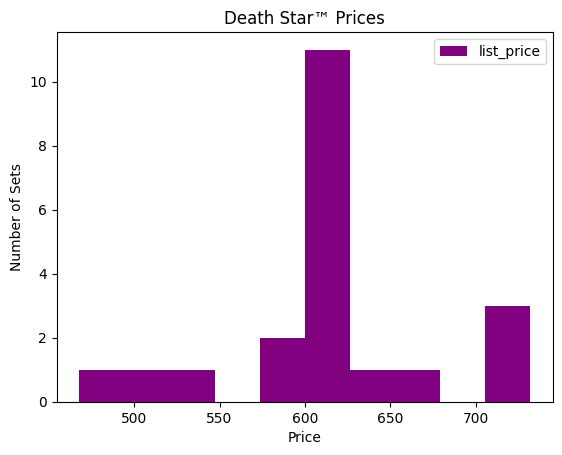

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# histogram
death_star["list_price"].hist(grid=False, legend=True, color="Purple")

# add labels, title
plt.xlabel("Price")
plt.ylabel("Number of Sets")
plt.title("Death Star™ Prices")

# show plot
plt.show()

In [ ]:
death_star["list_price"].value_counts()

609.9878    10
499.9900     1
607.9924     1
467.9922     1
590.5800     1
719.9520     1
539.8800     1
731.9390     1
573.9860     1
714.8700     1
638.9929     1
667.0000     1
Name: list_price, dtype: int64

In [ ]:
# desciption of distribution
death_star["list_price"].describe()

count     21.000000
mean     612.050119
std       63.569258
min      467.992200
25%      607.992400
50%      609.987800
75%      609.987800
max      731.939000
Name: list_price, dtype: float64

In [ ]:
# print median, mean, mode

print(f'Median: {round(death_star["list_price"].median(),2):>8}')
print(f'Mean: {round(death_star["list_price"].mean(),2):>10}')
print(f'Mode: {round(death_star["list_price"].mode()[0],2):>10}')
print(f'Skew: {round(death_star["list_price"].skew(),2):>10}')

Median:   609.99
Mean:     612.05
Mode:     609.99
Skew:      -0.13


**Antwort:**

Wir können sehen, dass die Distribution ungefähr Normalverteilt ist. Die grösste Anzahl an Death Star Legosets befindet sich visuell im Preis-Bereich von 600-625. Der häufigste Preis (Mode) liegt bei 609.99 und ist 10 Mal vertreten. Es kann angenommen werden, dass es sich dabei um den Marktpreis handelt.  Weiter gibt es 3 Sets die einen Preis  über 700 haben. Insgesamt reicht die Preisspanne von 467.99 bis 731.94.

 Der Mean (612.05) hat einen höheren Wert hat als der Median (609.99), dadurch würde man annehemen, dass die Distribution einen leichten Tail auf der rechten Seite hat und right/positive skewed ist. Die Berechnung zeigt jedoch, dass es sich hier um eine sehr leichte left/negative skewness handelt. Der Mode hat den gleichen Wert wie der Median und ist fast gleich wie der Mean, daher kann man sagen, dass die Distribution beinahe symmetrisch ist.

Source: https://medium.com/geekculture/what-are-right-skewed-and-left-skewed-distributions-a29b3def7598

# 3) Lineares Modell

Für die Vorhersage von Setpreisen haben wir Ihnen einen zweiten Datensatz vorbereitet "lego_sets_clean.csv". In diesem wurden bereits eine Reihe von "PreProcessing-Schritte" durchgeführt, damit wir eine Lineare Regression durführen können
- Aufteilen der features "ages" in min_age und max_age als numerische features
- Löschen der "missing values" (non null values)
- Umwandlung der "review_difficulty" feature auf eine Fünfer-Skala von 1-5
- Löschen irrelevanter Variablen für die Regression
- Umwandeln der objects "theme_name" und "country" in dummies

Wir werden die Pre-processing Schritte bei Besprechung des Assignments zusammendurchgehen. Zum jetzigen Verständnis ist erstmal nur relevant, dass "objects" in Pandas in Dummy-Variablen umgewandelt wurden, die ausschliesslich den Wert 0 oder 1 annehmen können. Das Feature "theme_name_classic" nimmt für ein bestimmtes Lego-Set den Wert 1 an, wenn es zum Theme "Classic" gehört und 0, wenn es nicht zum Theme Classic gehört. Wir werden dies aber auch nochmal im Kurs in Modul 3 besprechen am 11.10 (vor Abgabe des Assignments 1 besprechen).

## 3a) Lesen Sie den Datensatz "lego_sets_clean.csv" ein

In [ ]:
# read Dataset
lego_clean = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Business Analytics/Assignment 1/lego_sets_clean.csv")
# get information
lego_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 68 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   list_price                                        10162 non-null  float64
 1   num_reviews                                       10162 non-null  int64  
 2   piece_count                                       10162 non-null  int64  
 3   play_star_rating                                  10162 non-null  float64
 4   review_difficulty                                 10162 non-null  int64  
 5   star_rating                                       10162 non-null  float64
 6   val_star_rating                                   10162 non-null  float64
 7   min_age                                           10162 non-null  int64  
 8   max_age                                           10162 non-null  int64  
 9   theme_name_Angry 

In [ ]:
# get head of dataset
lego_clean.head()

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,theme_name_Angry Birds™,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,29.99,2,277,4.0,2,4.5,4.0,6,12,1,...,0,0,0,0,0,0,0,0,0,1
1,19.99,2,168,4.0,1,5.0,4.0,6,12,1,...,0,0,0,0,0,0,0,0,0,1
2,12.99,11,74,4.3,1,4.3,4.1,6,12,1,...,0,0,0,0,0,0,0,0,0,1
3,99.99,23,1032,3.6,2,4.6,4.3,12,99,0,...,0,0,0,0,0,0,0,0,0,1
4,79.99,14,744,3.2,3,4.6,4.1,12,99,0,...,0,0,0,0,0,0,0,0,0,1


Man kann sehen, dass bei der Umwandlung des Datensatzes von unclean zu clean One-Hot-Encoding angewendet wurde. Da jedoch die gleiche Anzahl an Country Dummies exisitert, könnte man einen Dummy löschen, um die Dummy-Trap zu verhindern.




## 3b) Erstellen Sie einen Trainings- und einen Testdatensatz. Der Testdatensatz soll die ersten 7000 Instanzen umfassen. Welche Schwierigkeiten könnten bei dieser Aufteilung auftreten?

In [ ]:
# create test set
test = lego_clean.iloc[:7000,:]
# create train set
train = lego_clean.iloc[7000:,:]

In [ ]:
train

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,theme_name_Angry Birds™,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
7000,24.3878,1,240,3.0,1,5.0,5.0,10,99,0,...,0,0,1,0,0,0,0,0,0,0
7001,12.1878,4,126,2.0,1,5.0,4.5,10,99,0,...,0,0,1,0,0,0,0,0,0,0
7002,12.1878,2,87,4.5,1,4.5,5.0,5,12,0,...,0,0,1,0,0,0,0,0,0,0
7003,219.5878,36,888,4.7,2,4.4,3.8,6,12,0,...,0,0,1,0,0,0,0,0,0,0
7004,158.5878,1,1250,5.0,2,5.0,4.0,8,12,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,36.5878,6,341,4.4,1,4.3,4.2,7,14,0,...,0,0,0,0,0,0,0,0,1,0
10158,24.3878,8,217,4.1,1,3.6,4.1,7,14,0,...,0,0,0,0,0,0,0,0,1,0
10159,24.3878,18,233,4.6,1,4.6,4.5,7,14,0,...,0,0,0,0,0,0,0,0,1,0
10160,12.1878,1,48,5.0,0,5.0,5.0,6,14,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
test

,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,theme_name_Angry Birds™,...,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT,country_US
0,29.9900,2,277,4.0,2,4.5,4.0,6,12,1,...,0,0,0,0,0,0,0,0,0,1
1,19.9900,2,168,4.0,1,5.0,4.0,6,12,1,...,0,0,0,0,0,0,0,0,0,1
2,12.9900,11,74,4.3,1,4.3,4.1,6,12,1,...,0,0,0,0,0,0,0,0,0,1
3,99.9900,23,1032,3.6,2,4.6,4.3,12,99,0,...,0,0,0,0,0,0,0,0,0,1
4,79.9900,14,744,3.2,3,4.6,4.1,12,99,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,12.1878,5,130,4.3,1,5.0,4.8,10,99,0,...,0,0,1,0,0,0,0,0,0,0
6996,12.1878,7,140,3.2,1,4.9,4.7,10,99,0,...,0,0,1,0,0,0,0,0,0,0
6997,12.1878,3,119,4.5,1,5.0,4.5,10,99,0,...,0,0,1,0,0,0,0,0,0,0
6998,12.1878,2,108,3.5,1,5.0,4.0,10,99,0,...,0,0,1,0,0,0,0,0,0,0


**Antwort:**

Normalerweis sollte der Trainingssatz (70%) grösser sein als der Testdatensatz (30%).

In diesem Fall ist der Testdatensatz mit 7000 entries deutlich grösser als der Trainingsdatensatz mit 3162 entries. Weiter sind die Instanzen nicht randomisiert zugeteilt worden, was dazu führen kann, dass die Datensätze nicht repräsentativ sind für den gesamten Datensatz.

Durch einen kleinen Testdatensatz kann das Modell weniger gut allgemeine Muster erkennen und es kann zu Underfitting kommen. Weiter gibt es  auch die Wahrscheinlichkeit, dass es zu Overfitting kommt. Die fehlenden Randomisierung führt dazu, dass das Modell zu stark an die Trainingsdaten angepasst ist und bei ungesehenen Daten schlecht performt. Dadurch wäre die Generalisierung nicht gewährleistet.

Es würde sich empfehlen die Aufteilung zu ändern und an die 70% Train 30% Test Regel anzupassen und die Aufteilung zu randomisieren. In diesem Fall wird aber auf eine Anpassung verzichtet, da es in der Aufgabe nicht verlangt wird.

## 3c) Erstellen Sie ein lineares Modell und trainieren Sie es zur Vorhersage des Preises. Lassen Sie sich den Summary Report ausgeben.

In [ ]:
### source: Modul 2, LinearRegrssion.ipynb

# import library
import statsmodels.api as sm

# predicting variable
X = train.iloc[:,1:]

# target variable
y = train["list_price"]

# adding constant
X = sm.add_constant(X)

# train model
model = sm.OLS(y,X)
model = model.fit()

# summary report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     412.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:35:53   Log-Likelihood:                -16069.
No. Observations:                3162   AIC:                         3.224e+04
Df Residuals:                    3113   BIC:                         3.253e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

Der R-squared (0.864) und Adj. R-squared (0.862) sind eher hoch. Einige der Variablen sind nicht statistisch signifikant wie z.B. star_rating. Prob(JB) ist unter 0.05 ist, was darauf hinweist, dass die Residuen nicht normalverteilt sind.

Source: https://medium.com/analytics-vidhya/how-to-interpret-result-from-linear-regression-3f7ae7679ef9

## 3d) Welchen Einfluss hat die Anzahl der Legosteine in einem Set auf den Preis? Ist dieser Signifikant? Was ist der marginale Umsatz pro zusätzlichem Legostein in einem Set?

In [ ]:
print(model.params["piece_count"])
print(model.pvalues["piece_count"])

0.09078411919623194
0.0


**Antwort:**

In den OLS Regressions Resultaten sehen wir, dass der Preis (abhängige Variable) von der unabhängigen Variabel piece_count mit einem Beta-Koeffizienten von +0.0908 positiv beeinflusst wird. Der Einfluss ist signifikant, da der p-value 0.00 unter 0.05. Der marginale Umsatz beträgt +0.0908 pro zusätzlichem Legostein.

# 4) Preisvorhersage

## 4a) Sagen Sie die Preise für die Testdaten voraus. Wie hoch ist der RMSE?

In [ ]:
# predicting variable
X_test = test.iloc[:,1:]

# target variable
y_test = test["list_price"]

# adding constant
X_test = sm.add_constant(X_test)

In [ ]:
# predicting
y_test_pred = model.predict(X_test)

y_test_pred

0        49.874786
1        28.919973
2        23.780334
3       106.713936
4        89.306806
           ...    
6995     11.040469
6996      4.844219
6997     15.948326
6998     14.115740
6999      2.818836
Length: 7000, dtype: float64

In [ ]:
# create dataframe to compare actual and predicted price
df2 = pd.DataFrame(y_test_pred, columns = ["Predicted Price"])
df2["Actual Price"] = y_test
df2

,Predicted Price,Actual Price
0,49.874786,29.9900
1,28.919973,19.9900
2,23.780334,12.9900
3,106.713936,99.9900
4,89.306806,79.9900
...,...,...
6995,11.040469,12.1878
6996,4.844219,12.1878
6997,15.948326,12.1878
6998,14.115740,12.1878


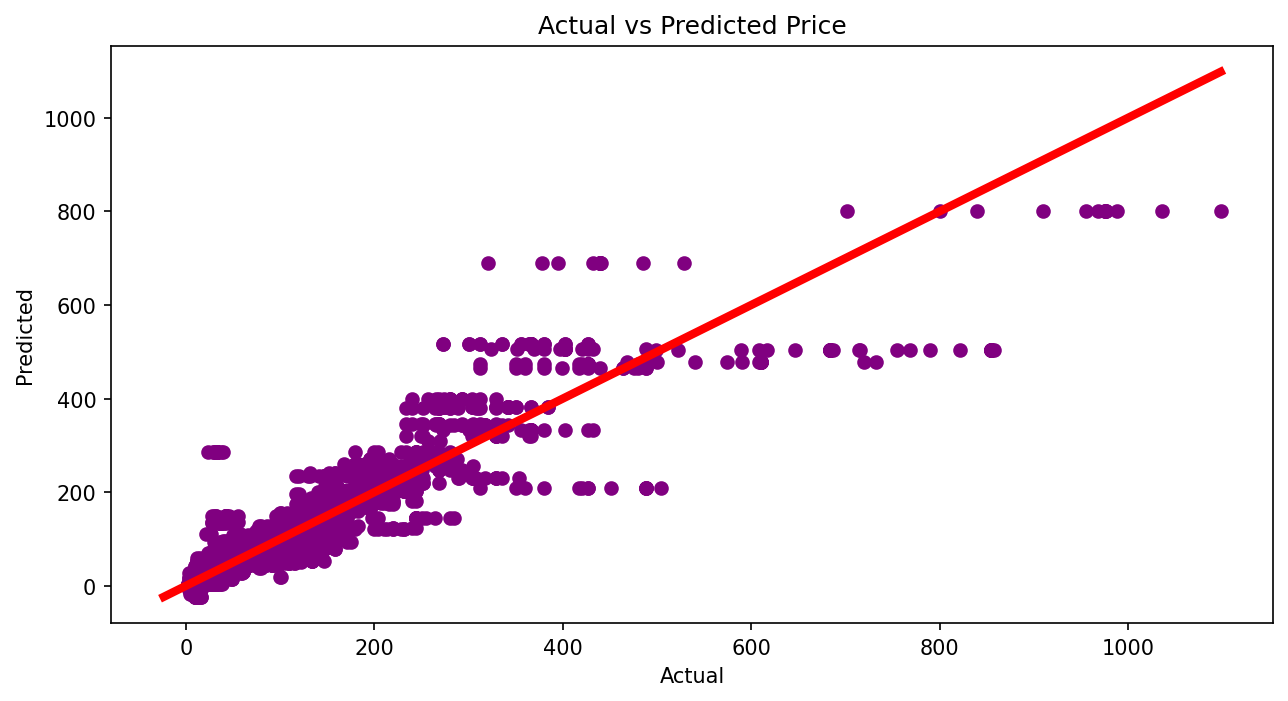

In [ ]:
### source: Modul 2, LinearRegrssion.ipynb

# import libraries
import matplotlib.pyplot as plt
import numpy as np

# define min and max values of the testset
min_value=np.array([y_test.min(), y_test_pred.min()]).min()
max_value=np.array([y_test.max(), y_test_pred.max()]).max()

# plot actual vs predicted price
fig, ax = plt.subplots(figsize=(10,5), dpi=150)
ax.scatter(y_test,y_test_pred, color="purple")
ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="red")
ax.set_title("Actual vs Predicted Price")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
### source: Modul 2, LinearRegrssion.ipynb

# calculate and save RMSE
RMSE = np.sqrt(np.mean((y_test_pred - y_test)**2))

# print results of RMSE, Average Actual Price, RMSE Percentage of Average Actual Price
print(f'RMSE: {round(RMSE, 2)}\n')
print(f'Average Actual Price {round(np.mean(y_test),2)}\n')
print(f'The RMSE is around {round(RMSE/np.mean(y_test)*100,2)}% of the Average Actual Price')

RMSE: 37.53

Average Actual Price 68.58

The RMSE is around 54.72% of the Average Actual Price


**Antwort:**

Der RMSE beträgt 37.53

## 4b) Interpretieren Sie den RMSE. Was sagt dieser eigentlich genau aus? Wie steht dieser in Relation zum mittleren Preis?

 Der RMSE zeigt wie stark eine Prognose im Durchschnitt von den tatsächlichen Beobachtungswerten abweicht. Der RMSE hat die gleiche Einheit wie die Zielvariable.

 Unser Modell weicht durchschnittlich 37.53 USD vom tatsächlichen Preis ab (*RMSE = 37.53*). Je tiefer der RMSE desto besser.

Der RMSE in unserem Modell macht fast 54% des mittleren Preises aus.
Daraus können wir schliessen, dass die Abweichung der Vorhersage im Verhältnis zum durschnittlichen  Preis sehr hoch ist.
Dieser hohe Wert weist auf ein ziemlich ungenaues Modell hin. Wäre der mittlere Preis höher würde der RMSE weniger stark ins Gewicht fallen, daher sollte bei der Beurteilung der Vorhersagekraft mit dem RMSE auch der mittlere Preis in Betracht gezogen werden.

In der Grafik bei 4a.) ist ersichtlich, dass vor allem die hohen Preise im Testset sehr ungenau sind, wodurch der RMSE noch stärker in die Höhe getrieben wird.




 Source: https://de.statista.com/statistik/lexikon/definition/303/root_mean_square_error/